In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Balancing using NEARMISS

In [2]:
import pandas as pd
from imblearn.under_sampling import NearMiss
from collections import Counter

# Define file paths
input_file_path = "/content/drive/MyDrive/CAPSTONE/kc2.csv"
output_file_path = "/content/drive/MyDrive/CAPSTONE/balanced_kc2_nearmiss.csv"

# Load KC2 dataset
kc2_data = pd.read_csv(input_file_path)

# Preprocess data
X = kc2_data.drop(columns=["problems"])
y = kc2_data["problems"]

# Display class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Apply NearMiss algorithm
nearmiss = NearMiss()
X_resampled, y_resampled = nearmiss.fit_resample(X, y)

# Display class distribution after balancing
print("Class distribution after balancing:", Counter(y_resampled))

# Save balanced dataset to a new file
balanced_kc2 = pd.concat([X_resampled, y_resampled], axis=1)
balanced_kc2.to_csv(output_file_path, index=False)

Class distribution before balancing: Counter({'no': 415, 'yes': 107})
Class distribution after balancing: Counter({'no': 107, 'yes': 107})


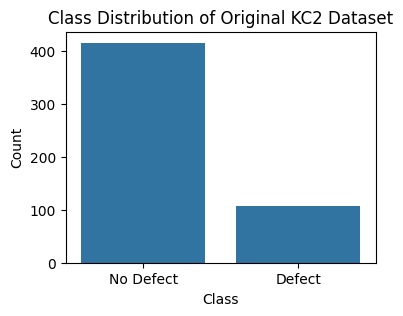

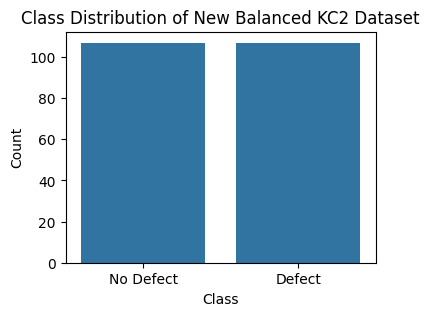

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original KC2 dataset
original_kc2_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/kc2.csv")

# Load the new balanced KC2 dataset
new_kc2_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/balanced_kc2_nearmiss.csv")

# Plot the class distribution of the original KC2 dataset
plt.figure(figsize=(4, 3))
sns.countplot(x='problems', data=original_kc2_data)
plt.title('Class Distribution of Original KC2 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Defect', 'Defect'])
plt.show()

# Plot the class distribution of the new balanced KC2 dataset
plt.figure(figsize=(4, 3))
sns.countplot(x='problems', data=new_kc2_data)
plt.title('Class Distribution of New Balanced KC2 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Defect', 'Defect'])
plt.show()

ML model training on NEARMISS balanced KC2 Dataset

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Preprocess data
X = new_kc2_data.drop(columns=["problems"])
y = new_kc2_data["problems"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Metrics for Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print("Classification Report:")
print(classification_report_rf)

Metrics for Random Forest Classifier:
Accuracy: 0.9534883720930233
Precision: 0.9577167019027484
Classification Report:
              precision    recall  f1-score   support

          no       0.91      1.00      0.95        20
         yes       1.00      0.91      0.95        23

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43



Support Vector Machine (SVM)

In [6]:
from sklearn.svm import SVC

# Train SVM Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
classification_report_svm = classification_report(y_test, y_pred_svm)

print("Metrics for Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print("Classification Report:")
print(classification_report_svm)

Metrics for Support Vector Machine (SVM) Classifier:
Accuracy: 0.6744186046511628
Precision: 0.8084815321477429
Classification Report:
              precision    recall  f1-score   support

          no       0.59      1.00      0.74        20
         yes       1.00      0.39      0.56        23

    accuracy                           0.67        43
   macro avg       0.79      0.70      0.65        43
weighted avg       0.81      0.67      0.65        43



Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print("Metrics for Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print("Classification Report:")
print(classification_report_logreg)

Metrics for Logistic Regression Classifier:
Accuracy: 0.9534883720930233
Precision: 0.9577167019027484
Classification Report:
              precision    recall  f1-score   support

          no       0.91      1.00      0.95        20
         yes       1.00      0.91      0.95        23

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43



K-Nearest Neighbors (KNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
classification_report_knn = classification_report(y_test, y_pred_knn)

print("Metrics for K-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print("Classification Report:")
print(classification_report_knn)

Metrics for K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.9534883720930233
Precision: 0.9577167019027484
Classification Report:
              precision    recall  f1-score   support

          no       0.91      1.00      0.95        20
         yes       1.00      0.91      0.95        23

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43



Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
classification_report_gb = classification_report(y_test, y_pred_gb)

print("Metrics for Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print("Classification Report:")
print(classification_report_gb)

Metrics for Gradient Boosting Classifier:
Accuracy: 0.9534883720930233
Precision: 0.9577167019027484
Classification Report:
              precision    recall  f1-score   support

          no       0.91      1.00      0.95        20
         yes       1.00      0.91      0.95        23

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43



Comparison Between models

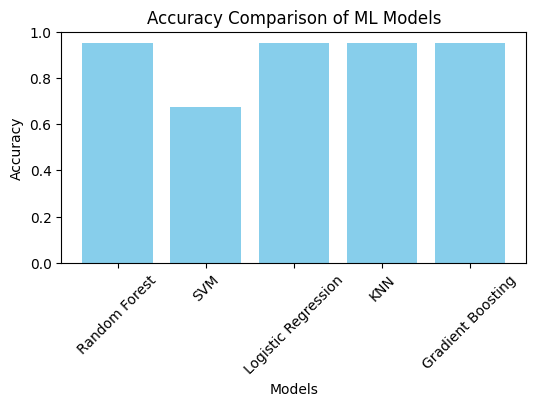

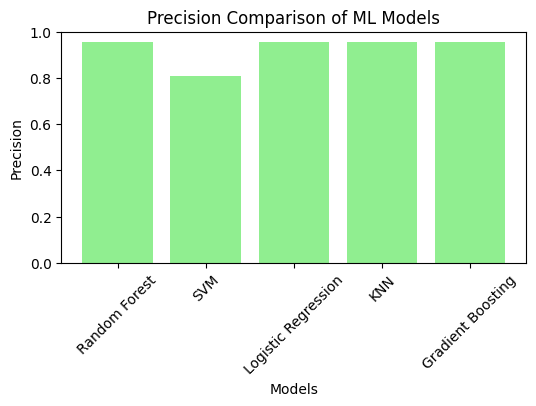

In [10]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logreg, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logreg, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

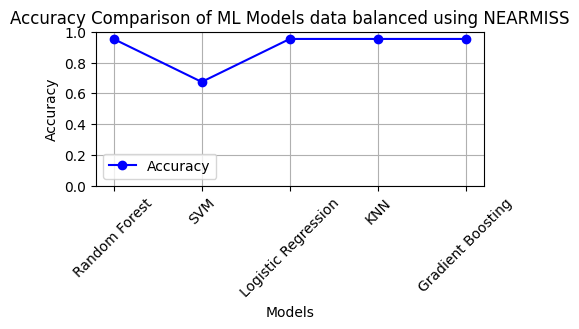

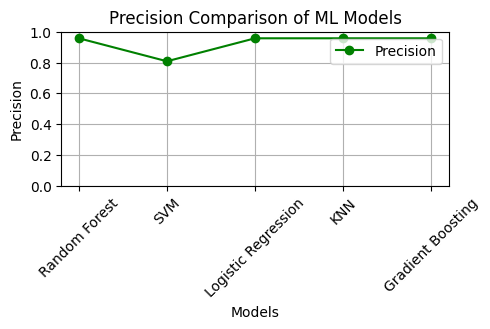

In [11]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logreg, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logreg, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models data balanced using NEARMISS')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()